In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt

# Atomic structure

In [2]:
from bem.matter import Atom, Lattice, Structure
atoms = [Atom('Ni', (0,0,0)), Atom('Ni', (0.5, 0.5, 0)),
         Atom('Ni', (0.5,0,0.5)), Atom('Ni', (0, 0.5, 0.5))]
a=3.5238
alpha = 90.
lattice = Lattice(a=a, b=a, c=a, alpha=alpha, beta=alpha, gamma=alpha)
fccNi = Structure(atoms, lattice, sgid=225)

# Cross section

<IPython.core.display.Javascript object>


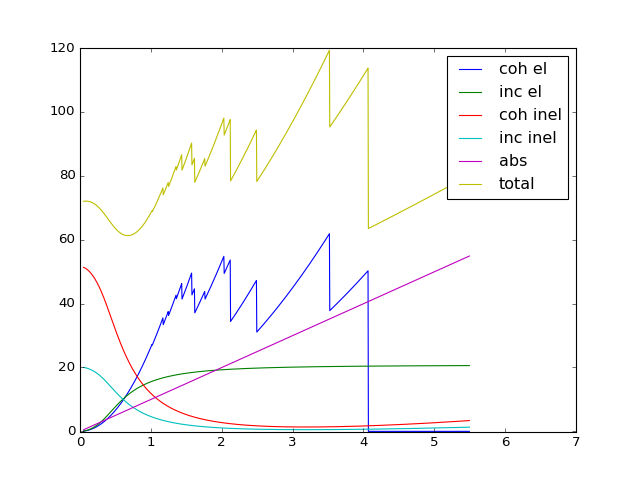

In [3]:
# define wavelength axis
import numpy as np
wavelengths = np.arange(0.05, 5.5, 0.005)
T = 300
# create calculator
from bem import xscalc
xscalculator = xscalc.XSCalculator(fccNi, T, max_diffraction_index=4)
# compute various contributions
# In neutron Bragg Edge data analysis, it may not be necessary to calculate all these
# contributions, but it is useful to see them when exploring.
coh_el_xs = xscalculator.xs_coh_el(wavelengths)
inc_el_xs = xscalculator.xs_inc_el(wavelengths)
abs_xs = xscalculator.xs_abs(wavelengths)
coh_inel_xs = xscalculator.xs_coh_inel(wavelengths)
inc_inel_xs = xscalculator.xs_inc_inel(wavelengths)
# and the total cross section
total = xscalculator.xs(wavelengths)
# plot
plt.figure()
plt.plot(wavelengths, coh_el_xs, label='coh el')
plt.plot(wavelengths, inc_el_xs, label='inc el')
plt.plot(wavelengths, coh_inel_xs, label='coh inel')
plt.plot(wavelengths, inc_inel_xs, label='inc inel')
plt.plot(wavelengths, abs_xs, label='abs')
plt.plot(wavelengths, total, label='total')
plt.ylim(-0.2, None)
plt.xlim(0,7)
plt.legend()
plt.show()

# Texture

In [4]:
from bem import xtaloriprobmodel as xopm
texture_model = xopm.MarchDollase()
texture_model.r[(0,0,1)] = 2
texture_model.beta[(0,0,1)] = np.deg2rad(60.)

In [5]:
xscalculator = xscalc.XSCalculator(fccNi, T, texture_model)

<IPython.core.display.Javascript object>


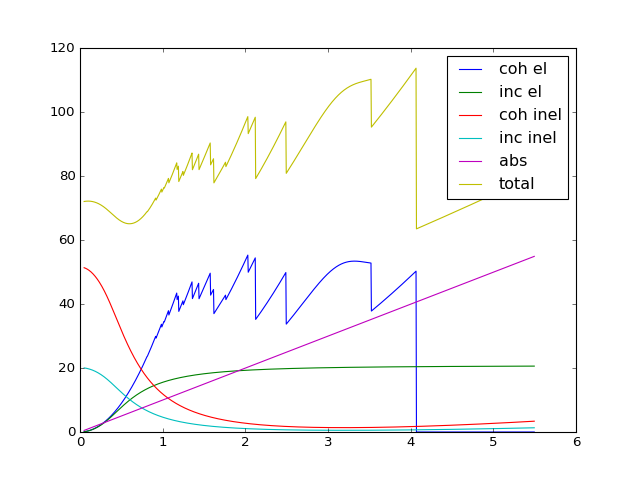

/home/lj7/dv/Imaging/braggedgemodeling/bem/xtaloriprobmodel.py:50: RuntimeWarning: invalid value encountered in divide
  div = np.array(hkl, float)/np.array(hkl1, float)
/home/lj7/dv/Imaging/braggedgemodeling/bem/xtaloriprobmodel.py:69: RuntimeWarning: invalid value encountered in arcsin
  alpha = np.pi/2 - np.arcsin(wavelen/2./peak.d)
/home/lj7/dv/Imaging/braggedgemodeling/bem/xtaloriprobmodel.py:50: RuntimeWarning: divide by zero encountered in divide
  div = np.array(hkl, float)/np.array(hkl1, float)
/home/lj7/dv/Imaging/braggedgemodeling/bem/xtaloriprobmodel.py:52: RuntimeWarning: invalid value encountered in multiply
  if np.allclose(hkl, np.array(hkl1)*div):


In [6]:
plt.figure()
xscalculator.plotAll(wavelengths)
plt.show()

# Peak profile

<IPython.core.display.Javascript object>


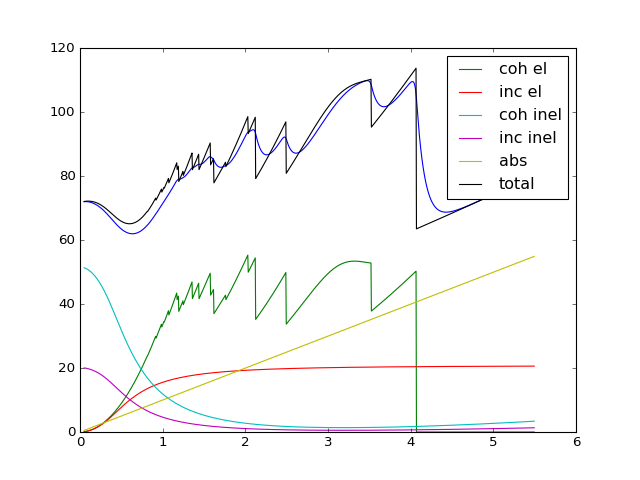

In [8]:
from bem import peak_profile as pp, calc
jorgensen = pp.Jorgensen(alpha=[50, 0.], beta=[10, 0], sigma=[0, .003, 0])
spectrum_calculator = calc.BraggEdgeSpectrumCalculator(xscalculator, jorgensen)
# calculate total cross section convolved with peak profile
spectrum = spectrum_calculator('total', wavelengths)
# plot it
plt.figure()
plt.plot(wavelengths, spectrum)
# also plot the cross sections
xscalculator.plotAll(wavelengths)
plt.show()